In [1]:
import pandas as pd

In [2]:
f_nota = pd.read_csv('C:/Users/Tiago/AppData/Roaming/jupyter/runtime/BDR.csv', sep=',', encoding='cp1252')

f_nota.head()

,Unnamed: 0,prova_realizada_em,dia_da_prova_realizada,nota,nota_redacao,horario_da_prova,sexo,estado_civil,escolaridade,cidade_de_nascimento,bairro
0,0,GO - Goiás,13/01/2017,"7,45","2,2",manhã,Masculino,Casado(a),Ensino médio,fortaleza,Asa Sul
1,1,GO - Goiás,10/01/2017,"7,4","2,4",manhã,Masculino,Casado(a),Especialização,Recife,Norte (Águas Claras)
2,2,GO - Goiás,07/01/2017,"7,3","1,8",manhã,Masculino,Casado(a),Superior,BRASILIA,Setor Sudoeste
3,3,GO - Goiás,02/01/2017,"7,2","1,7",Noite,Masculino,Solteiro(a),Ensino médio,Brasília,Setor Norte
4,4,GO - Goiás,09/01/2017,"6,95","1,7",manhã,Feminino,Solteiro(a),Superior,BRASÍLIA,Guará I


In [7]:
f_nota['nota'] = f_nota['nota'].str.replace(',', '.')

In [8]:
f_nota['nota'] = f_nota['nota'].astype(float)

In [9]:
f_nota['nota_redacao'] = f_nota['nota_redacao'].str.replace(',', '.')

In [10]:
f_nota['nota_redacao'] = f_nota['nota_redacao'].astype(float)

In [11]:
# PÚBLICO ALVO IDEAL
# pa_g1 = público alvo - grupo 1 - perfil vencedor (alunos aprovados melhores notas);
# Público alvo ideal - Alunos que tiveram nota maior ou igual a 8 e não zeraram na prova de redação;
# Este é um grupo de 'elite' que pode servir como referencia para os demais grupos à medida em que seu desempenho
# tem potencial para atrair e motivar outros alunos; 

pa_g1 = f_nota[(f_nota['nota'] >=8) & (f_nota['nota'] <=10) & (f_nota['nota_redacao'] > 0)]

In [31]:
# Estatística do público alvo ideal:
# Representa (1,45%) da população total de alunos (12.100);
# Média da nota da prova (8,40); média da nota da redação (2,03). Existe uma correlação alta entre as variáveis;
# Variância dos resultados da prova (38,75%); variância dos resultados da nota da redação (27,26%);
# Até 75% dos alunos tiveram com nota da prova (8,60) e da redação (2,20);
# A nota máxima da prova foi (10) e da redação (2,50);
# A nota mínima deste grupo na prova foi (8,00) e na redação (1,10).
pa_g1.describe()

,Unnamed: 0,nota,nota_redacao
count,176.000000,176.000000,176.000000
mean,7664.698864,8.401420,2.033523
std,2402.328013,0.387572,0.272682
min,41.000000,8.000000,1.100000
25%,7482.750000,8.137500,1.900000
50%,7912.000000,8.300000,2.000000
75%,9332.250000,8.600000,2.200000
max,10166.000000,10.000000,2.500000


In [12]:
# Perfil segundo a localização geográfica:
# No que tange ao local onde a prova foi realizada destacam-se as UF: RJ, BA, CE, PB, PA
# Representam da 1º a 5º posição;
# Importante observar que PA foi o local com maior número de alunos: 1.556

pa_g1['prova_realizada_em'].value_counts()

RJ - Rio de Janeiro         35
BA - Bahia                  24
CE - Ceará                  23
PB - Paraíba                16
PA - Pará                   14
GO - Goiás                  12
MS - Mato Grosso do Sul     11
MG - Minas Gerais           11
SC - Santa Catarina          6
RS - Rio Grande do Sul       5
MA - Maranhão                4
AM - Amazonas                3
RO - Rondônia                3
RR - Roraima                 3
TO - Tocantins               3
PI - Piauí                   1
RN - Rio Grande do Norte     1
PE - Pernambuco              1
Name: prova_realizada_em, dtype: int64

In [15]:
from matplotlib.pyplot import *

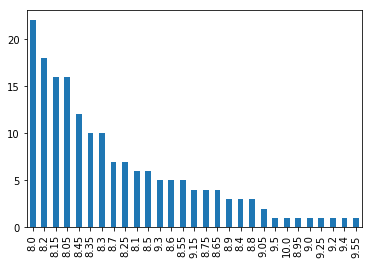

In [17]:
pa_g1['nota'].value_counts().plot.bar()

In [60]:
# Concentradas nas capitais
pa_g1['cidade_de_nascimento'].value_counts()/176*(100)

Rio de Janeiro             3.977273
Salvador                   3.409091
Fortaleza                  3.409091
João Pessoa                2.272727
São Paulo                  2.272727
FORTALEZA                  2.272727
Volta Redonda              1.704545
Barra Mansa                1.704545
Belém                      1.704545
SALVADOR                   1.704545
Diamantina                 1.136364
CAMPO GRANDE               1.136364
BOA VISTA                  1.136364
BARRA MANSA                1.136364
Juiz de Fora               1.136364
BELÉM                      1.136364
BELO HORIZONTE             1.136364
ALAGOA GRANDE              1.136364
Pôrto Alegre               0.568182
AUGUSTINÓPOLIS             0.568182
INHAMBUPE                  0.568182
ilheus                     0.568182
Sousa                      0.568182
PICOS                      0.568182
RIO PRETO                  0.568182
Porto Alegre               0.568182
Belo Horizonte             0.568182
Jacobina                   0

In [61]:
# Concentrado no centro;
pa_g1['bairro'].value_counts()/176*(100)

Centro                         19.318182
Setor Central                   1.704545
Setor Oeste                     1.136364
centro                          1.136364
Aterrado                        1.136364
Ano Bom                         1.136364
Brotas                          1.136364
Taquara                         1.136364
Setor Goiânia 2                 0.568182
Zona Rural                      0.568182
Plano Diretor Sul               0.568182
Vila Alagoana                   0.568182
Reduto                          0.568182
IPITANGA                        0.568182
Maracangalha                    0.568182
tresidela                       0.568182
Três Marias                     0.568182
Prefeito José Walter            0.568182
Ururaí                          0.568182
Jardim Apipema                  0.568182
Alto da Balança                 0.568182
Industrial                      0.568182
Santa Rita                      0.568182
Monte Castelo                   0.568182
Parque Eldorado 

In [47]:
# Pefil dos alunos segundo o Gênero:
# 73,86% homens e 26,13% mulheres
pa_g1['sexo'].value_counts()/176*(100)

Masculino    73.863636
Feminino     26.136364
Name: sexo, dtype: float64

In [49]:
# Perfil dos alunos segundo o estado civil:
# Solteiros representam 59,65%;
# Casados representam 31,25%;
pa_g1['estado_civil'].value_counts()/176*100

Solteiro(a)      59.659091
Casado(a)        31.250000
Divorciado(a)     7.386364
Separado(a)       1.136364
Viúvo(a)          0.568182
Name: estado_civil, dtype: float64

In [54]:
# Perfil dos alunos segundo a escolaridade:
# Com ensino superior representam 43,75%
# Com ensino médio representam 30,68%
pa_g1['escolaridade'].value_counts()/176*100

Superior               43.750000
Ensino médio           30.681818
Superior incompleto     9.659091
Especialização          9.090909
Mestrado                3.409091
Nível técnico           2.840909
Doutorado               0.568182
Name: escolaridade, dtype: float64

In [59]:
pa_g1['horario_da_prova'].value_counts()/176*100

manhã    50.0
Noite    50.0
Name: horario_da_prova, dtype: float64

In [61]:
# 12/08/2016 uma sexta-feira
# 09/08/2016 uma terça-feira
# 11/08/2016 uma quinta-feira
pa_g1['dia_da_prova_realizada'].value_counts()/176*100

12/08/2016    12.500000
09/08/2016    11.363636
11/08/2016    10.227273
06/08/2016     7.954545
13/08/2016     7.954545
07/08/2016     6.250000
01/08/2016     6.250000
08/08/2016     5.681818
04/08/2016     5.113636
28/07/2016     4.545455
05/08/2016     2.840909
30/07/2016     2.272727
02/08/2016     2.272727
12/01/2017     2.272727
29/07/2016     2.272727
10/01/2017     1.704545
31/07/2016     1.704545
15/01/2017     1.704545
14/01/2017     1.136364
17/01/2017     1.136364
09/01/2017     0.568182
05/01/2017     0.568182
02/01/2017     0.568182
06/01/2017     0.568182
13/01/2017     0.568182
Name: dia_da_prova_realizada, dtype: float64

In [62]:
rj = pa_g1[pa_g1['prova_realizada_em'] == 'RJ - Rio de Janeiro']

In [63]:
rj.describe()

,Unnamed: 0,nota,nota_redacao
count,35.000000,35.00000,35.000000
mean,7765.685714,8.42000,2.020000
std,2383.591269,0.39299,0.283673
min,512.000000,8.00000,1.500000
25%,7627.500000,8.07500,1.800000
50%,7636.000000,8.30000,2.000000
75%,8733.500000,8.70000,2.300000
max,10166.000000,9.20000,2.400000


In [ ]:
# ANÁLISE SINTÉTICA PERFIL PÚBBLICO ALVO IDEAL - ÁREA DE MARKETING
# O pa_g1 público alvo ideal tem como origem geográficas estados de maior dinamicidade econômica e por consequência desenvolvimento,
# O RJ concentra parte significativa da indústria de petróleo assim como a BA, além de montadoras, e indústria petroquímica
# que vem a reboque destes setores. Com efeito, a renda per-capita destes regiões e superior e por consequência o nível 
# de educação. Ainda são pessoas que nasceram nesta capitais e que residem na área central.
# Prevalece o gênero masculino, embora a melhor nota tenha sido obtida pelo gênero feminino. Este resultado pode estar associado
# a disponbilidade de tempo para estudo. Especialmente se considerado o estado civil, de solteiro.
# A prevalência do nível de escolaridade 'superior' reforça a correlação entre tempo de estudo e resultados obtidos.

In [2]:
import pandas as pd
s_nota = pd.read_csv('C:/Users/Tiago/AppData/Roaming/jupyter/runtime/BDR.csv', sep=',', encoding='cp1252')
s_nota['nota'] = s_nota['nota'].str.replace(',', '.')
s_nota['nota'] = s_nota['nota'].astype(float)
s_nota['nota_redacao'] = s_nota['nota_redacao'].str.replace(',', '.')
s_nota['nota_redacao'] = s_nota['nota_redacao'].astype(float)

In [3]:
# ANÁLISE DO PERFIL - TIME DE MONITORIA - AÇÕES PREVENTIVAS
# pa_g3 = público alvo - grupo 3 - perfil alunos com possibilidade de reprovação;
# Previsão a partir de Alunos que tiveram nota maior ou igual a 0,75 até 4,95 e que não zeraram na redação;
pa_g3 = s_nota[(s_nota['nota'] >=0) & (s_nota['nota'] <=4.95) & (s_nota['nota_redacao'] > 0)]

In [34]:
pa_g3.describe()

,Unnamed: 0,nota,nota_redacao
count,614.000000,614.000000,614.000000
mean,5437.923453,4.734039,1.288599
std,2491.016343,0.205704,0.306483
min,39.000000,3.550000,0.200000
25%,3726.250000,4.650000,1.100000
50%,5544.500000,4.750000,1.300000
75%,6439.750000,4.900000,1.500000
max,12016.000000,4.950000,1.700000


In [35]:
pa_g3['prova_realizada_em'].value_counts()

PA - Pará                   90
RR - Roraima                56
GO - Goiás                  47
MA - Maranhão               46
SC - Santa Catarina         44
SE - Sergipe                35
PB - Paraíba                33
RO - Rondônia               32
CE - Ceará                  29
RN - Rio Grande do Norte    29
RS - Rio Grande do Sul      27
MS - Mato Grosso do Sul     25
MT - Mato Grosso            23
ES - Espírito Santo         21
PI - Piauí                  20
RJ - Rio de Janeiro         17
BA - Bahia                  12
MG - Minas Gerais           11
TO - Tocantins               9
PE - Pernambuco              6
AM - Amazonas                2
Name: prova_realizada_em, dtype: int64

In [65]:
# Predominantemente interior
pa_g3['cidade_de_nascimento'].value_counts()

Boa Vista                    8
Xinguara                     8
TERESINA                     6
Quixadá                      5
IMPERATRIZ                   5
FLORIANO                     5
Campina Grande               5
Itabaiana                    4
Ulianópolis                  4
RIO BANANAL                  4
Pastos Bons                  4
BARÃO DE GRAJAÚ              4
BOA VISTA                    3
Aracaju                      3
Quixeramobim                 3
Cruz Alta                    3
CRUZ ALTA                    3
pastos bons                  3
Maracaju                     3
Campos dos Goytacazes        3
maracaju                     3
Boa vista                    3
apodi                        3
capanema                     3
Rio de Janeiro               3
São Sepé                     3
Porto Velho                  3
Belém                        3
carira                       3
Caracaraí                    2
                            ..
canindé                      1
Bom Jesu

In [66]:
# Predominantemente centro
pa_g3['bairro'].value_counts()

Centro                                     164
ZONA RURAL                                  13
Zona Rural                                   8
zona rural                                   7
Zona rural                                   7
CENTRO                                       6
Interior                                     5
INTERIOR                                     5
Setor Central                                5
centro                                       5
São José                                     4
rural                                        4
Senador Hélio Campos                         4
Buritis                                      3
Alto São Francisco                           3
Centro                                       3
ZONA RURAL                                   3
Caranã                                       3
Centenário                                   2
Santos Dumont                                2
Nossa Senhora Aparecida                      2
Cambará      

In [4]:
pa_g3['sexo'].value_counts()/614*100

Masculino    56.677524
Feminino     42.996743
Name: sexo, dtype: float64

In [38]:
pa_g3['estado_civil'].value_counts()/614*100

Solteiro(a)      65.635179
Casado(a)        30.944625
Divorciado(a)     1.954397
Separado(a)       0.651466
Viúvo(a)          0.488599
Name: estado_civil, dtype: float64

In [41]:
pa_g3['escolaridade'].value_counts()/614*100

Ensino médio           70.358306
Superior               17.426710
Superior incompleto     7.980456
Nível técnico           2.117264
Especialização          1.465798
Ensino fundamental      0.162866
Mestrado                0.162866
Name: escolaridade, dtype: float64

In [42]:
pa_g3['horario_da_prova'].value_counts()/614*100

Noite    59.120521
manhã    40.553746
Name: horario_da_prova, dtype: float64

In [ ]:
# TIME DE MONITORIA - AÇÕES PREVENTIVAS - 1º 'recote- alunos com nota acima de 0 na redação'
# O perfil destes alunos é semelhante ao perfil dos alunos aprovados que obtiveram com nota de prova até 7,95.
# o qual é analisado na sequência e disciminado com o perfil - aprovados;
# Neste grupo Não há grande variância entre as notas e a média (4,70) está muito próxima ao valor de corte;
# Com relação ao local da prova está concentrado em regiões de menor desenvolvimento econômico;
# Prevalece uma equidade entre os gêneros e a maior parte dos alunos concentra-se no ensino médio;
# Ainda o número de solteiro é mais que
# dobro dos casados;
# Análise de alunos com perfil semelhante deve ser considerada neste momento, como um alerta, considerando especialmente o grau
# de formação e o estado civil;
  

In [67]:
import pandas as pd
s_nota = pd.read_csv('C:/Users/Tiago/AppData/Roaming/jupyter/runtime/BDR.csv', sep=',', encoding='cp1252')
s_nota['nota'] = s_nota['nota'].str.replace(',', '.')
s_nota['nota'] = s_nota['nota'].astype(float)
s_nota['nota_redacao'] = s_nota['nota_redacao'].str.replace(',', '.')
s_nota['nota_redacao'] = s_nota['nota_redacao'].astype(float)

In [68]:
# ANÁLISE DO PERFIL - TIME DE MONITORIA - AÇÕES PREVENTIVAS
# pa_g4 = público alvo - grupo 4 - perfil alunos com possibilidade de reprovação;
# Previsão a partir de Alunos que tiveram nota maior ou igual a 0,75 até 4,95 e que zeraram na redação;
pa_g4 = s_nota[(s_nota['nota'] >=0) & (s_nota['nota'] <=4.95) & (s_nota['nota_redacao'] >=0)]

In [69]:
pa_g4.describe()

,Unnamed: 0,nota,nota_redacao
count,6231.000000,6231.000000,6231.000000
mean,6554.455304,3.111250,0.126978
std,3259.789756,0.767315,0.395937
min,39.000000,0.750000,0.000000
25%,3887.500000,2.750000,0.000000
50%,5602.000000,3.000000,0.000000
75%,10520.500000,3.500000,0.000000
max,12099.000000,4.950000,1.700000


In [70]:
pa_g4['prova_realizada_em'].value_counts()

PA - Pará                   929
GO - Goiás                  761
BA - Bahia                  476
MG - Minas Gerais           463
RR - Roraima                451
MS - Mato Grosso do Sul     418
MA - Maranhão               390
RJ - Rio de Janeiro         292
CE - Ceará                  262
PB - Paraíba                261
RO - Rondônia               244
SC - Santa Catarina         223
SE - Sergipe                167
MT - Mato Grosso            167
RN - Rio Grande do Norte    147
RS - Rio Grande do Sul      130
TO - Tocantins              128
PE - Pernambuco             124
PI - Piauí                   81
ES - Espírito Santo          77
AM - Amazonas                40
Name: prova_realizada_em, dtype: int64

In [71]:
# Região Noroeste, sudoeste...
pa_g4['cidade_de_nascimento'].value_counts()

BOA VISTA                 61
Boa Vista                 51
Balsas                    47
Paragominas               39
Sete Lagoas               38
Belo Horizonte            36
PARAGOMINAS               32
Capanema                  32
CAPANEMA                  32
SETE LAGOAS               32
Boa vista                 31
Pastos Bons               30
IMPERATRIZ                28
boa vista                 28
Xinguara                  27
Goiânia                   27
Fortaleza                 26
Campo Grande              26
GOIANIA                   26
Imperatriz                26
Barra Mansa               25
capanema                  25
Maracaju                  24
BELO HORIZONTE            24
Belém                     22
Quixeramobim              21
paragominas               19
Ulianópolis               19
TERESINA                  19
Cristalina                19
                          ..
Uruana                     1
PI                         1
Afogados Recife            1
ouro predo d' 

In [72]:
# Centro
pa_g4['bairro'].value_counts()

Centro                                 1323
Setor Central                           126
ZONA RURAL                              116
zona rural                               63
Zona Rural                               56
CENTRO                                   50
centro                                   44
Zona rural                               32
São José                                 23
Santo Antônio                            20
Boa Vista                                19
rural                                    17
Tancredo Neves                           15
Rural                                    15
Alvorada                                 14
Caranã                                   14
BOA VISTA                                14
Dom João VI                              14
Cidade Nova                              14
Asa Branca                               14
INTERIOR                                 13
Santa Luzia                              13
Santa Tereza                    

In [74]:
# Perfil por Gênero
pa_g4['sexo'].value_counts()/6231*100

Masculino    49.911732
Feminino     49.671000
Name: sexo, dtype: float64

In [76]:
# Perfil por estado civil
pa_g4['estado_civil'].value_counts()/6231*100 

Solteiro(a)      68.977692
Casado(a)        26.223720
Divorciado(a)     3.001123
Separado(a)       1.123415
Viúvo(a)          0.224683
0                 0.032098
Name: estado_civil, dtype: float64

In [77]:
pa_g4['escolaridade'].value_counts()/6231*100

Ensino médio           71.930669
Superior               14.588349
Superior incompleto     7.045418
Nível técnico           3.386294
Especialização          1.765367
Ensino fundamental      0.433317
Mestrado                0.272829
MBA                     0.064195
Não informado           0.048146
Doutorado               0.048146
Name: escolaridade, dtype: float64

In [78]:
pa_g4['horario_da_prova'].value_counts()/6231*100

Noite    56.379393
manhã    43.203338
Name: horario_da_prova, dtype: float64

In [ ]:
# TIME DE MONITORIA - AÇÕES PREVENTIVAS - 2º 'recote- alunos com nota a partir de 0 na redação'
# Neste grupo há grande variância entre as notas e a média (3,11);
# Com relação ao local da prova está concentrado em regiões Norte,Centro-Oeste e Sudoeste;
# Prevalece uma equidade entre os gêneros e a maior parte dos alunos concentra-se no ensino médio;
# Ainda o número de solteiro é maior que a de casados;
# Há forte correlação entre o resultado da prova e o resultado da nota da redação, aqueles alunos que tiveram
# o pior desempenho nas notas, obtiveram nota '0' na redação. Neste sentido, podem ser tomadas ações preventivas
# ligadas a elaboração de textos;

In [12]:
import pandas as pd
s_nota = pd.read_csv('C:/Users/Tiago/AppData/Roaming/jupyter/runtime/BDR.csv', sep=',', encoding='cp1252')
    s_nota['nota'] = s_nota['nota'].str.replace(',', '.')
s_nota['nota'] = s_nota['nota'].astype(float)
s_nota['nota_redacao'] = s_nota['nota_redacao'].str.replace(',', '.')
s_nota['nota_redacao'] = s_nota['nota_redacao'].astype(float)


In [ ]:
# pa_g2 = público alvo potencial - grupo 2 - perfil alunos aprovados;
# Público alvo ideal - Alunos que tiveram nota maior ou igual a 5 e não zeraram na prova de redação;
# Este é um grupo de 'aprovado' ou alunos que estão na média; 
pa_g2 = s_nota[(s_nota['nota'] >=5) & (s_nota['nota'] <=7.95) & (s_nota['nota_redacao'] > 0)]

In [13]:
#Estatísticas do público alvo potencial;
# Representa (46,70%) da população total de alunos (12.100)
# Média da nota da prova (6,07); média da nota da redação (1,67). Mantém a correlação alta entre as variáveis;
# Média da nota da prova, bastante inferior, se comparada ao grupo 1, se deve ao fato em que a variância neste grupo é alta;
# Variância dos resultados da prova (70,94%); variância dos resultados da nota da redação (31,04%);
# Até 75% dos alunos tiveram com nota da prova (6,55) e da redação (1,90);
# A nota máxima da prova foi (7,95) e da redação (1,90);
# A nota mínima deste grupo na prova foi (5,00) e na redação (0,3);
# Observa-se que neste grupo que as médias das notas da prova foram muito mais afetadas que as da redação;
pa_g2.describe()

,Unnamed: 0,nota,nota_redacao
count,5651.000000,5651.000000,5651.000000
mean,5425.776500,6.071370,1.668875
std,3654.898507,0.709429,0.310475
min,0.000000,5.000000,0.300000
25%,1459.500000,5.500000,1.500000
50%,7182.000000,5.950000,1.700000
75%,8707.500000,6.550000,1.900000
max,11791.000000,7.950000,2.500000


In [14]:
# Perfil segundo a localização geográfica:
# No que tange ao local onde a prova foi realizada destacam-se as UF: PA, GO, RJ, MG, MS
# Representam da 1º a 5º posição;
# Importante observar que PA foi o local com maior número de alunos: 1.556

pa_g2['prova_realizada_em'].value_counts()

PA - Pará                   608
GO - Goiás                  570
RJ - Rio de Janeiro         445
MG - Minas Gerais           420
MS - Mato Grosso do Sul     405
BA - Bahia                  387
PB - Paraíba                332
MA - Maranhão               330
RR - Roraima                323
SC - Santa Catarina         314
RS - Rio Grande do Sul      275
CE - Ceará                  269
RO - Rondônia               206
TO - Tocantins              194
MT - Mato Grosso            165
PE - Pernambuco              83
RN - Rio Grande do Norte     82
SE - Sergipe                 73
AM - Amazonas                62
PI - Piauí                   59
ES - Espírito Santo          49
Name: prova_realizada_em, dtype: int64

In [16]:
# Pefil dos alunos segundo o Gênero:
# 59,68% homens e 40,06% mulheres
# Neste grupo a participação por gênero é mais equânime
pa_g2['sexo'].value_counts()/5651*(100)

Masculino    59.688551
Feminino     40.063706
Name: sexo, dtype: float64

In [17]:
# Perfil dos alunos segundo o estado civil:
# Solteiros representam 63,61%;
# Casados representam 30,57%;
# Participação semelhante a observada no perfil público alvo;
pa_g2['estado_civil'].value_counts()/5651*100

Solteiro(a)      63.617059
Casado(a)        30.578659
Divorciado(a)     4.176252
Separado(a)       1.008671
Viúvo(a)          0.353920
0                 0.017696
Name: estado_civil, dtype: float64

In [18]:
# Perfil dos alunos segundo a escolaridade:
# Com ensino médio representam 55,42%   
# Com ensino superior representam 24,99% 
# Se comparado ao grupo 1 perfil vencedor pode-se verificar uma inversão das posições, uma vez, que naquele grupo
# destacavam-se os alunos com nível superior (43,75%);
pa_g2['escolaridade'].value_counts()/5651*100

Ensino médio           55.423819
Superior               24.986728
Superior incompleto    10.157494
Especialização          4.052380
Nível técnico           3.592285
Mestrado                0.796319
MBA                     0.371616
Ensino fundamental      0.176960
Doutorado               0.123872
Não informado           0.070784
Name: escolaridade, dtype: float64

In [20]:
# Pravalece o grupo de alunos que realizaram a prova a noite. Esta pode estar relacionada a realização de atividade 
# profissional no período da manhã; 
pa_g2['horario_da_prova'].value_counts()/5651*100

Noite    55.866218
manhã    43.886038
Name: horario_da_prova, dtype: float64

In [22]:
# 16/01/2017 Segunda-feira
# 15/01/2017 Domingo
# 13/08/2016 Sábado
# 12/08/2016 Sexta-feira
# Aproximadamente 22% dos alunos realizaram a prova no sábado, domingo ou segunda-feira, fortalecendo a hipótese 
# de possivel vínculo profissional ou outras atividades;
pa_g2['dia_da_prova_realizada'].value_counts()/5651*100

16/01/2017    8.724120
15/01/2017    8.069368
13/08/2016    6.582906
12/08/2016    6.335162
11/08/2016    5.184923
08/08/2016    5.167227
14/01/2017    4.795611
12/01/2017    4.530172
13/01/2017    4.530172
17/01/2017    4.016988
04/08/2016    3.893116
10/01/2017    3.379933
09/01/2017    3.309149
07/08/2016    3.132189
05/08/2016    3.026013
09/08/2016    2.795965
06/08/2016    2.742877
05/01/2017    2.583614
01/08/2016    1.999646
06/01/2017    1.911166
07/01/2017    1.840382
28/07/2016    1.822686
08/01/2017    1.804990
02/08/2016    1.468767
31/07/2016    1.397983
29/07/2016    1.238719
02/01/2017    0.955583
30/07/2016    0.884799
03/01/2017    0.884799
01/01/2017    0.300832
11/01/2017    0.230048
10/08/2016    0.141568
31/12/2016    0.070784
Name: dia_da_prova_realizada, dtype: float64

In [ ]:
# OUTROS INSIGHTS
# Em síntese o grupo g2 - público alvo potencial tem como origem geográfica regiões de menor desenvolvimento econômico, 
# Possui uma participação por gênero mais equitativa e um nível de escolaridade menor quando comparado ao grupo 1.
# A partir desta característica é possível estabelecer a hipótese de que o mesmo possa possuir algum tipo de vínculo
# atribuição ou outros fatores que impactam / restringem seu tempo de estudo e/ou sistema de estudos e por consequência 
# seu resultado; Neste sentido, ações que tornem o processo de aprendizagem mais dinâmico, também aquelas que impliquem 
# no estabelecimento de rotinas que possam ser desenvolvidas um um curto perído de tempo, talvez, possam apresentar mair
# eficiência para o desenvolvimento deste grupo;
